This guide was compiled by [Ashkan Abbasi](https://github.com/ashkan-abbasi66).

# A guide to some basic image processing operations in python
<br>
Reading and displaying an image is among the most frequntly used operations. However, since there are various ways for doing them in Python, sometimes it is confusing!. In this guide, I will show you the most common ways. I am sure that this will save your time!. Also, there are other tips that might be useful.
- matplotlib (Read and Display an image)
- PIL (Read and Display an image; Save noisy image;resize;color space)
- CV2 (Read and Display an image)

TOC:<br>
-  [matplotlib](#matplotlib)<br>
-  [CV2](#cv2)<br>
-  [PIL](#pil)<br>

See also, [here](https://www.geeksforgeeks.org/reading-images-in-python/?ref=lbp).

# matplotlib<a name="matplotlib"></a>
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension (NumPy).<br> For more information, [here](https://matplotlib.org/users/image_tutorial.html) is a great tutorial.

## Read an image and display it<a name='matplotlib-imread'></a>

Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data.<br>
Let's read a PNG image. Notice to the data type and range.

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as img


def image_info(I):

    print(type(I))
    print(I.dtype)
    print(I.shape)
    print(I.min(), I.max())
        
    print('Minimum and Maximum intensity values for each channel:')
    
    for ch in range(I.shape[2]):
        print(I[:,:,ch].min(), ", ", I[:,:,ch].max())

        
Ipng = plt.imread('datasets/image_GoldFinch.png')
image_info(Ipng)

<class 'numpy.ndarray'>
float32
(702, 702, 3)
0.0 1.0
Minimum and Maximum intensity values for each channel:
0.0 ,  1.0
0.007843138 ,  1.0
0.0 ,  0.9843137


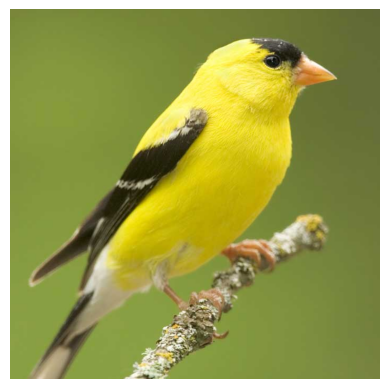

In [76]:
plt.imshow(Ipng)
plt.axis('off')
plt.show()

Now, let's read an image which is not saved in PNG format. Notice to the data type and range.

In [78]:
I = plt.imread('datasets/image_GoldFinch.tif')
image_info(I)

<class 'numpy.ndarray'>
uint8
(702, 702, 3)
0 255
Minimum and Maximum intensity values for each channel:
0 ,  255
2 ,  255
0 ,  251


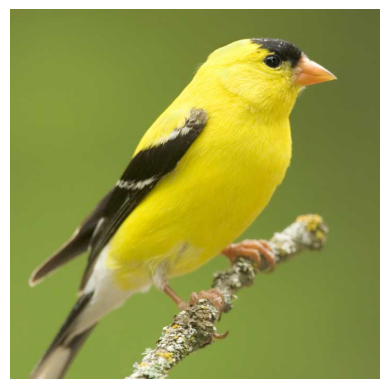

In [79]:
plt.imshow(I)
plt.axis('off')
plt.show()

The above example shows that `matplotlib` reads a `PNG` file into a numpy array of `float32` ([0.0, 1.0]). But it reads a `TIF` file into a numpy array of `uint8` ([0, 255]).

## Save an image<a name='matplotlib-imsave'></a>

In [80]:
plt.imsave("Ipng.png", Ipng)

Ipng_file = plt.imread('Ipng.png')
image_info(Ipng_file)

<class 'numpy.ndarray'>
float32
(702, 702, 4)
0.0 1.0
Minimum and Maximum intensity values for each channel:
0.0 ,  1.0
0.007843138 ,  1.0
0.0 ,  0.9843137
1.0 ,  1.0


In [84]:
plt.imsave("Itif_as_png.png", I)  # because "plt.imsave" cannot save as tif image

Itif_as_png = plt.imread('Itif_as_png.png')

image_info(I)
print("-----------------------------------------------")
image_info(Itif_as_png)

<class 'numpy.ndarray'>
uint8
(702, 702, 3)
0 255
Minimum and Maximum intensity values for each channel:
0 ,  255
2 ,  255
0 ,  251
-----------------------------------------------
<class 'numpy.ndarray'>
float32
(702, 702, 4)
0.0 1.0
Minimum and Maximum intensity values for each channel:
0.0 ,  1.0
0.007843138 ,  1.0
0.0 ,  0.9843137
1.0 ,  1.0


## Make a grayscale image<a name='matplotlib-gray'></a>

In [85]:
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [86]:
plt.imsave("Ipng_gray.png", rgb2gray(Ipng))

Ipng_gray = plt.imread('Ipng_gray.png')
image_info(Ipng_gray)

<class 'numpy.ndarray'>
float32
(702, 702, 4)
0.0 1.0
Minimum and Maximum intensity values for each channel:
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
1.0 ,  1.0


In [87]:
plt.imsave("Ipng_gray_file_1st_channel.png", Ipng_gray[:, :, 0])

Ipng_gray_file_1st_channel = plt.imread('Ipng_gray_file_1st_channel.png')
image_info(Ipng_gray_file_1st_channel)

<class 'numpy.ndarray'>
float32
(702, 702, 4)
0.0 1.0
Minimum and Maximum intensity values for each channel:
0.0 ,  1.0
0.0 ,  1.0
0.0 ,  1.0
1.0 ,  1.0


Note:
1. `plt.imsave` only supports saving in {`png`, `ps`, `pdf`, `svg`} formats, and when it saves as `png`, the range is [0.0, 1.0]
2. It saves a `PNG` image with 4 channels.

## Padding<a name='matplotlib-padding'></a>

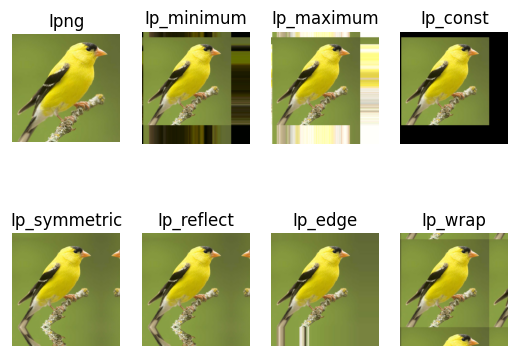

In [74]:
import numpy as np

left = 10
right = 150
top = 50
bottom = 150

Ip_minimum = np.pad(Ipng, [(top, bottom), (left, right), (0,0)], 'minimum')

Ip_maximum = np.pad(Ipng, [(top, bottom), (left, right), (0,0)], 'maximum')

Ip_const = np.pad(Ipng, [(top, bottom), (left, right), (0,0)], 'constant', constant_values=((0, 0), (0, 0), (0, 0)))

Ip_symmetric = np.pad(Ipng, [(top, bottom), (left, right), (0,0)], 'symmetric')

Ip_reflect = np.pad(Ipng, [(top, bottom), (left, right), (0,0)], 'reflect')

Ip_edge = np.pad(Ipng, [(top, bottom), (left, right), (0,0)], 'edge')

Ip_wrap = np.pad(Ipng, [(top, bottom), (left, right), (0,0)], 'wrap')

img_dict = {"Ipng": Ipng, 
            "Ip_minimum":Ip_minimum, "Ip_maximum": Ip_maximum, "Ip_const": Ip_const, 
            "Ip_symmetric": Ip_symmetric, "Ip_reflect": Ip_reflect, "Ip_edge": Ip_edge, 
            "Ip_wrap":Ip_wrap}

fig = plt.figure()

for ii, (key, value) in enumerate(img_dict.items()):
    a = fig.add_subplot(2,4,ii + 1)
    a.set_title(key)
    plt.imshow(value)
    plt.axis('off')
    
plt.show()

# CV2 <a name="cv2"></a>
OpenCV is an open-source library that includes several hundreds of computer vision algorithms. The library is cross-platform and free for both academic and commercial use.

## Read an image and display it<a name='cv2-imread'></a>
Note that the following piece of code will open a window to display the image. Press a key to close it.

In [88]:
import cv2
import matplotlib.pyplot as plt

fname = 'datasets/image_GoldFinch.png'
I = cv2.imread(fname, cv2.IMREAD_COLOR)

# display an image
cv2.imshow('Input Image', I)
cv2.waitKey(0) # 0: wait indefinitely for a key stroke.
cv2.destroyAllWindows() #  destroys all the windows we created. 

In [89]:
image_info(I)

<class 'numpy.ndarray'>
uint8
(702, 702, 3)
0 255
Minimum and Maximum intensity values for each channel:
0 ,  251
2 ,  255
0 ,  255


Unlike, `matplotlib`, image is saved with 3 channels.

**Warning**: By default, OpenCV does not load an image in RGB mode. The color image is loaded in BGR mode. 

The following example shows that when an image is loaded by OpenCV, you cannot correctly display it using `matplotlib`. In order to show it correctly, you need to convert it from `BGR` to `RGB`.

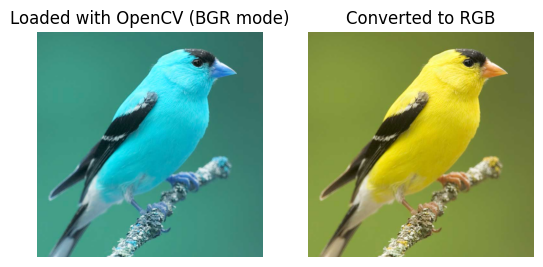

In [90]:
I = cv2.imread(fname, cv2.IMREAD_COLOR)

fig = plt.figure()
a = fig.add_subplot(1,2,1)
a.set_title('Loaded with OpenCV (BGR mode)')
plt.imshow(I)
plt.axis('off')
b = fig.add_subplot(1,2,2)
b.set_title('Converted to RGB')

# -------------------------------------
# import numpy as np
# blue = I[:,:,0]
# green = I[:,:,1]
# red = I[:,:,2]
# J = np.empty_like(I)
# J[:,:,0] = red
# J[:,:,1] = green
# J[:,:,2] = blue

# Faster alternative
# J = I[:,:,-1:-4:-1] # or simply J = I[:,:,::-1]

# cv2.cvtColor
J = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
# -------------------------------------

plt.imshow(J)
plt.axis('off')

plt.show()

## Make a grayscale image <a name='cv2-bgr2gray'></a>

In [91]:
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

cv2.imshow('Input Image', Igray)
cv2.waitKey(0) # 0: wait indefinitely for a key stroke.
cv2.destroyAllWindows() #  destroys all the windows we created. 

In [92]:
cv2.imwrite("Igray_cv2.png", Igray)

True

In [93]:
Igray_file = cv2.imread("Igray_cv2.png")

In [94]:
image_info(Igray_file)

<class 'numpy.ndarray'>
uint8
(702, 702, 3)
1 254
Minimum and Maximum intensity values for each channel:
1 ,  254
1 ,  254
1 ,  254


## Resize an image <a name='cv2-resize'></a>


In [14]:
I.shape

(702, 702, 3)

In [36]:
Ix2 = cv2.resize(I, dsize=(1404, 1404), interpolation=cv2.INTER_LINEAR)

print(Ix2.shape)
print(Ix2.dtype)

(1404, 1404, 3)
uint8


Now, let's resize a numpy array:

In [39]:
a = np.ones((5, 5), dtype=np.int32)
print(a)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [40]:
ax2 = cv2.resize(a, dsize=(10, 10), interpolation=cv2.INTER_LINEAR)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3940: error: (-215:Assertion failed) func != 0 in function 'cv::hal::resize'


OpenCV can work with float or unsigned integer.

In [41]:
ax2 = cv2.resize(a.astype(np.uint8), dsize=(7, 7), interpolation=cv2.INTER_LINEAR)
print(ax2)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


In [42]:
ax2 = cv2.resize(a.astype(np.float32), dsize=(7, 7), interpolation=cv2.INTER_LINEAR)
print(ax2)

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


# PIL (Python Imaging Library)<a name="pil"></a>
PIL is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. It is available for Windows, Mac OS X and Linux. 

## Read an image and display it<a name='pil-imread'></a>
The following piece of code opens the image in your system's default image viewer.

In [36]:
from PIL import Image
fname = 'datasets/image_GoldFinch.png'
I = Image.open(fname) #.convert('L') can be used to convert an rgb image to gray-scale

I.show()

print('Minimum and Maximum intensity values for each channel:',I.getextrema())

Minimum and Maximum intensity values for each channel: ((0, 255), (2, 255), (0, 251))


Let's get some information about the image

In [37]:
print(I.mode) # returns 'RGB' or 'L' for color image and gray-scale image, respectively.
print(I.info) # returns a dictionary containing various information about the image.

RGB
{'dpi': (71.9836, 71.9836)}


You can get channels in a tuble. Also, you can access each channel directly using `split()`.

In [38]:
bands_tuple = I.getbands()
print(bands_tuple)
print(len(bands_tuple))

R,G,B = I.split()
print(I.getpixel((0,0)))
print(R.getpixel((0,0)))
print(G.getpixel((0,0)))
print(B.getpixel((0,0)))

('R', 'G', 'B')
3
(121, 135, 58)
121
135
58


## Create a noisy image and save it <a name='pil-noise-save'></a>

In [39]:
# Convert it to a numpy array
import numpy as np
arr = np.asarray(I)
width,height,channels = arr.shape # Returns width, height and number of channels

sigma = 20
noise = 20*np.random.randn(width,height,channels) # $$~N(0,\sigma^2 = 20)$$
arr=arr+noise

# -----------------------------------
# Scale the image

# import utils
# arr_scaled = utils.imadjust(arr,arr.min(),arr.max(),0,255)

# Alternatively:
arr_scaled = np.clip(arr,0,255)
# -----------------------------------

# save the image
#   1. Convert numpy array's data type to UINT8
#   2. Apply Image.fromarray to make a PIL image
#   3. Use save method
In=Image.fromarray(np.uint8(arr_scaled))
In.save('image_GoldFinch_noisy.png')

In.show()

## Make an image grayscale and save it <a name='pil-grayscale'></a>

In [43]:
from PIL import ImageOps

In_gray = ImageOps.grayscale(In)
In_gray.save('image_GoldFinch_noisy_gray.png')

In_gray.show()

print('Minimum and Maximum intensity values for each channel:',In_gray.getextrema())

Minimum and Maximum intensity values for each channel: (0, 255)


## Resize an image <a name='pil-resize'></a>

In [16]:
width2 = 250
height2 = 250
I2 = I.resize((width2, height2),Image.ANTIALIAS)

I2.show()

C:\Users\ashkan\AppData\Local\Temp\ipykernel_3852\2921340810.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  I2 = I.resize((width2, height2),Image.ANTIALIAS)


## Color space <a name='pil-colorSpace'></a>

In [17]:
r,g,b = I.split()

r.show()

Iycc = I.convert('YCbCr')
luminance,_,_ = Iycc.split()

luminance.show()